# Optimizing a SCUBA Diving Trip in Phuket Using Linear Programming

## Introduction
Phuket, Thailand, a haven for SCUBA diving enthusiasts, offers a tapestry of underwater marvels. This project employs linear programming to craft an optimal diving itinerary in Phuket, aiming to maximize the overall diving experience. This endeavor not only promises an enthralling underwater journey but also showcases the power of mathematical optimization in recreational planning.

## Background and Context
Linear programming, a cornerstone in the field of optimization, finds its application in diverse areas, from logistics to sports. In this project, its principles are uniquely applied to SCUBA diving in Phuket, a domain where each dive site offers distinct depths, currents, and ecological diversity, making trip planning a complex but fascinating optimization problem.

## Problem Definition
The objective is to maximize the total experience score, a combined measure of biodiversity and popularity. Decision variables represent the selection of dive sites, with constraints on the number of dives, current strength, and depth limits. This problem formulation turns dive planning into a quantifiable decision-making process.

## Linear Programming Problem Formulation
We aim to maximize the total experience score (negative values in `c` for maximization) under constraints including the total number of dives, current strength limits, and a total depth limit for safety. The decision variables are binary, indicating the selection of dive sites.

**Objective Function**: 
- Maximize `c = -np.array([8, 7, 6, 7, 8, 9, 8])`

**Constraints**:
1. Total number of dives: `A_ub[0] = [1, 1, 1, 1, 1, 1, 1]`, `b_ub[0] = 5` - this means that we are looking at 7 diver sites (so each 1 corresponds to us choosing that to be a possible dive site) and b = 5 would be the max number of dives that we are considering (so in this case we are looking to have 5 dives from 7 possible dive sites).
2. Current strength limit: `A_ub[1] = [0, 0, 0, 0, 3, 6, 2]`, `b_ub[1] = 10`- for this metric, we are looking at the strength of the currents of each of the respective dive sites. This can be altered based on the found data and the values are chosen based on the research and data gathered. the b matrix for this shows the maximum strength level of the currents. This has been selected not based on an arbitrary absolute value but instead has been converted to a strength measure on a scale of 10 based on the available information and reviews from other divers who have conducted dives at the respective sites. In order to reproduce this for different dive sites and different locations, one would have to look at various reviews that mention the strength. Most reviews focus the strength in terms of mild, moderate, strong with slightly more descriptions on the degree of the strength which is what was then used to estimate a numerical score on 10
3. Depth limit: `A_ub[2] = [50, 40, 35, 25, 32, 30, 20]`, `b_ub[2] = 150` - The depth limit is a score that takes the actual m depths of dives that usually occur in the respective dive sites. the b matrix for this particular metric shows the max possible depth that dives can go to and can be adjusted based on the divers level and certifications (in terms of reproducibility). Thus as an example, if a user is an Advanced SCUBA Diver then they woudl be allowed to go to a max depth of 20m. This would mean that they would set b_ub[2] = 20 but in that case it would have no effect as all dive sites go beyond that depth. so b would be the max depth a diver would be willing to go to and it would mainly affect decisions for dive sites under the limit (such as the fish tank dive site with a max depth of 5m).  

**Bounds**: 
- `x_bounds = [(0, 1) for _ in range(7)]`


## Data Overview
Data on various dive sites around Phuket includes depth, visibility, current strength, and ecological richness. This comprehensive dataset is crucial for our linear programming model, enabling a detailed and nuanced analysis of each site's contribution to the diving experience.



In [1]:
#Building a comprehensive dataset is out of scope for this artifact, that being said, certain scores were compilled already


## Dataset 

#### Phi Phi Island:

Depth: Maximum depth is around 50 meters, average depth varies depending on the specific dive site within Phi Phi 
Island.

Visibility: 10-30 meters, with an average of 20 meters. Conditions can vary depending on season and weather.

Current: Average current strength (4/10). Can be stronger at certain dive sites like Shark Point.

Biodiversity Score: 8/10. Diverse marine life including coral reefs, sharks, turtles, and a variety of fish species.

Popularity Score: 9/10. One of the most popular dive destinations in Phuket due to its beauty and easy accessibility.

#### Racha Noi:

Depth: Maximum depth can reach 40 meters, with average depths ranging from 15-25 meters.

Visibility: Generally good visibility, ranging from 15-30 meters with an average of 20 meters.

Current: Mild to moderate currents (2-5/10), can be stronger at some sites like Raya Bay.

Biodiversity Score: 7/10. Healthy coral reefs, various fish species, occasional sightings of manta rays and sharks.

Popularity Score: 7/10. Less crowded than Phi Phi Island but still a popular choice for divers seeking good visibility and healthy reefs.

#### Racha Yai:

Depth: Maximum depth around 35 meters, average depths of 10-20 meters.

Visibility: Similar to Racha Noi, 15-30 meters with an average of 20 meters.

Current: Generally mild currents (2-3/10).

Biodiversity Score: 6/10. Good variety of fish species, healthy coral formations, occasional sightings of larger 
marine life like turtles and eagle rays.

Popularity Score: 6/10. Less crowded than Phi Phi Island or Racha Noi, offering a more relaxed diving experience.

#### South Tip Racha Noi:

Depth: Maximum depth around 25 meters, average depths of 10-15 meters.
Visibility: Good visibility, typically 15-25 meters with an average of 20 meters.

Current: Mild currents (2-3/10).

Biodiversity Score: 7/10. Known for its coral gardens, diverse fish life, and occasional sightings of turtles and stingrays.

Popularity Score: 5/10. Less crowded than other Racha islands, offering a serene diving experience.

#### King Cruiser Wreck:

Depth: The wreck rests at around 32 meters, with surrounding areas ranging from 15-35 meters.

Visibility: Variable, can range from 10-25 meters depending on conditions.

Current: Moderate currents (3-5/10) are common.

Biodiversity Score: 8/10. The wreck itself teems with marine life, attracting various fish species and even larger 
animals like sharks.

Popularity Score: 8/10. A popular wreck dive for experienced divers due to its historical significance and diverse marine life.

#### Shark Point:

Depth: Maximum depth around 30 meters, with average depths of 15-20 meters.

Visibility: Generally good visibility, ranging from 15-25 meters with an average of 20 meters.

Current: Strong currents (6-8/10) are common, making it a drift dive suitable for experienced divers only.

Biodiversity Score: 9/10. High chance of encountering reef sharks, along with diverse fish species, turtles, and other marine life.

Popularity Score: 7/10. Popular among experienced divers seeking adrenaline and shark encounters, but requires strong diving skills due to the currents.

#### Anemone Reef:

Depth: Maximum depth around 20 meters, with average depths of 10-15 meters.

Visibility: Good visibility, typically 15-25 meters with an average of 20 meters.

Current: Mild to moderate currents (2-4/10).

Biodiversity Score: 8



##### A Brief note on the Scores and metrics of the dive sites

- Depth: This was directly taken by looking at various sources and taking the actual meter depth of the various dives at sites (note some sites can go 200m deep but most dives hover around 20m so the depth would be 20-25m based on the user)
- Visibility: The categories created are poor, moderate, good, and excellent. These categories are based on the distance a diver is able to see (the clarity). So for example, 20 meters of visibility in mainly the horizontal direction would constitute good visibility. The distinctions are approximately as follows: 0-10 = Poor Visibility, 10-15: moderate, 15-25 = good, 25+: Excellent. This can also be arbitrarily changed but the absolute values are based on actual data and would require the dataset for the user to alter.
- Current: Similar to the visibility and the strength (described above), the current has been calculated based on the strength descriptions and has then been changed into a score on 10. So through research, descriptions of currents are provided in terms of mild, moderate, strong, etc and they are then converted to a score with 0-3 being mild, 4-6 being moderate, 6-10 being strong (or very strong).
- Biodiversity Score: This score is quantified on a scale of 10 as well. The way it has been calculated is once again based primarily on reviews and observations. The score primarily showcases the number and rarity of the different species that can be found at a particular dive site. So for example, a dive site with only clownfish would have a 1 but a dive site with only reef sharks would have a 2 or 3 score. This is because reef sharks are rarer occurrences to spot and are more sought after by divers to spot clownfish. Thus, this score can be based on the individual user's preferences and must be looked at and verified by available data (more species and more sought-after species = higher score of 10)

## Methodology
The methodology section details the linear programming model's formulation, including data preprocessing and the use of Python libraries for solving the LP problem. The section also explains the role of PCA in simplifying the complexity of our multi-dimensional data for better visualization and understanding.



In [2]:
#insert description
#data taken, made into LP problem to be solved, solved and visualized

## Results
This section discusses the outcome of the linear programming model, highlighting the selected dive sites and the rationale behind their selection based on the model's optimization criteria.



In [3]:
import numpy as np
from scipy.optimize import linprog

# Coefficients of the objective function (negative for maximization)
c = -np.array([8, 7, 6, 7, 8, 9, 8])

# Coefficients for the inequality constraints (A_ub x <= b_ub)
# Adding depth as a constraint for illustrative purposes; normally this would be time, nitrogen levels, etc.
A_ub = np.array([
    [1, 1, 1, 1, 1, 1, 1],  # Constraint: Total number of dives
    [4, 3.5, 2.5, 2.5, 4, 7, 3],  # Constraint: Current strength limit 
    [50, 40, 35, 25, 32, 30, 20]  # Constraint: Depth limit
])

b_ub = np.array([5,  # Total number of dives
                 10,  # Arbitrary limit for current strength to create a meaningful constraint
                 150])  # Total depth limit

x_bounds = [(0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1)]

res = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=x_bounds, method='highs', integrality=True)

res.x 


array([1., 0., 0., 1., 0., 0., 1.])

## Visualization and Interpretation
PCA plots are used to provide a visual representation of the solution space. This section interprets these plots, explaining how they reflect the optimization process and the constraints of the linear programming model.



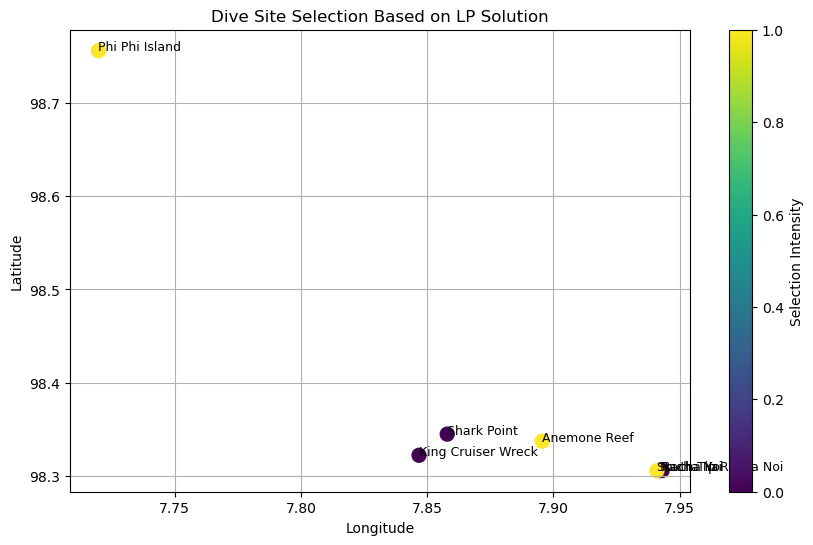

[1. 0. 0. 1. 0. 0. 1.]


In [4]:
import matplotlib.pyplot as plt
import numpy as np

coordinates = np.array([
    [7.719722, 98.756062],  # Phi Phi Island
    [7.942056, 98.305669],  # Racha Noi
    [7.943076, 98.305769],  # Racha Yai
    [7.941026, 98.305549],  # South Tip Racha Noi
    [7.846739, 98.322114],  # King Cruiser Wreck
    [7.857924, 98.344814],  # Shark Point
    [7.895538, 98.337253]   # Anemone Reef
])


selection_intensity = res.x 

plt.figure(figsize=(10, 6))
plt.scatter(coordinates[:, 0], coordinates[:, 1], s=100, c=selection_intensity, cmap='viridis')

dive_site_names = ['Phi Phi Island', 'Racha Noi', 'Racha Yai', 'South Tip Racha Noi', 'King Cruiser Wreck', 'Shark Point', 'Anemone Reef']

for i, txt in enumerate(dive_site_names):
    plt.annotate(txt, (coordinates[i, 0], coordinates[i, 1]), fontsize=9)

plt.colorbar(label='Selection Intensity')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Dive Site Selection Based on LP Solution')
plt.grid(True)
plt.show()
print(selection_intensity)

Considering the plot above, it says we should go to Phi Phi Island, Anemone Reef and then South tip racha Noi. To make this selection better visible I am going to show 2 plots, one with all (as seen above) and one with only Racha Noi, South tip Racha Noi, and Racha Yai. To do so, I am going to replicate the plot to now have a limit so we can see those points better. 

The one with only the three dive sites is below:

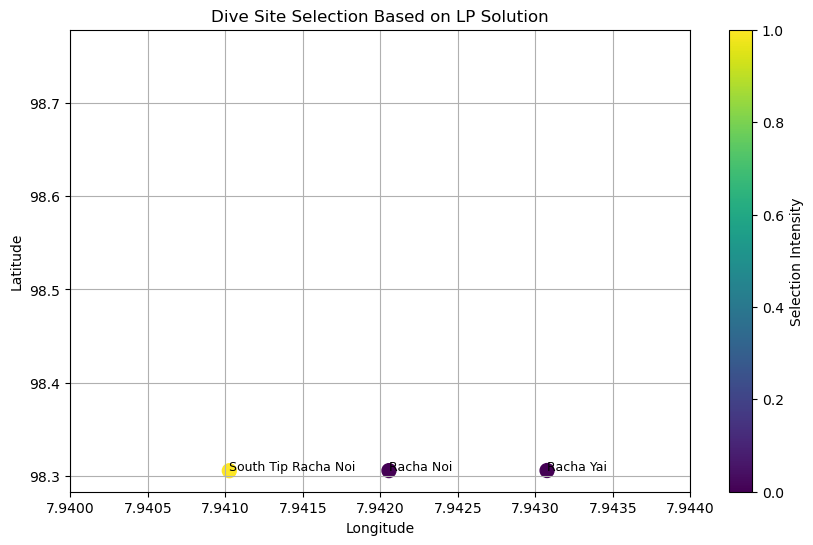

[1. 0. 0. 1. 0. 0. 1.]


In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(coordinates[:, 0], coordinates[:, 1], s=100, c=selection_intensity, cmap='viridis')

dive_site_names = ['Phi Phi Island', 'Racha Noi', 'Racha Yai', 'South Tip Racha Noi', 'King Cruiser Wreck', 'Shark Point', 'Anemone Reef']

for i, txt in enumerate(dive_site_names):
    plt.annotate(txt, (coordinates[i, 0], coordinates[i, 1]), fontsize=9)

plt.colorbar(label='Selection Intensity')
plt.xlim(7.940, 7.944)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Dive Site Selection Based on LP Solution')
plt.grid(True)
plt.show()
print(selection_intensity)

As we can see better now in the plot above, our function outputs a result that says we should only go to South Tip Racha Noi and not the other dive sites. 

## Discussion
As we can see through the plots above, our function takes into account all the parameters given, solves them in the form of a linear program and then comes out with an output of integers between 0 and 1 where 1 depicts the dive sites we should visit optimally versus the ones to avoid in one trip.



## Conclusion and Reflection
Through this project, we have found that for Phuket, in one dive trip the optimal dive sites to visit should be Phi Phi Island, Anemone Reef, and South tip Racha Noi. The way this was chosen is due to my particular constraints and the weights allocated based on those constraints caused these responses. It is interesting to note that while the max dive sites are 5, the algorithm still outputs 3 values as it looks for optimality.



## References
All data sources, academic papers, Python libraries, and other external resources referenced in the project are listed here.

- Garlotta, Danika. “Scuba Diving in Thailand’s Phi Phi Island.” No Destinations, No Destinations, 13 Mar. 2019, www.nodestinations.com/blog/phi-phi-islands-diving-seabees-thailand.
- “Racha Noi Island.” Sunrise Divers, 29 Apr. 2022, www.sunrise-divers.com/dive-sites/racha-noi-island/.
- Bees, Sea. “Diving in Racha Yai.” Sea Bees Diving Thailand, 3 Nov. 2023, sea-bees.com/diving-in-racha-yai/.
- “South Tip - Racha Noi.” Aloha Diving Phuket, 3 Sept. 2023, alohadiving.com/avada_portfolio/south-tip-racha-noi/.
- “King Cruiser Wreck.” Sunrise Divers, 29 Aug. 2018, www.sunrise-divers.com/dive-sites/king-cruiser-wreck/.
- “Scuba Diving in Shark Point.” Phuket Dive Center, 9 Sept. 2022, phuketdivecenter.com/sharkpoint/.
- Admin_PDT. “Anemone Reef.” Phuket Dive Tours, 9 Oct. 2018, www.phuketdivetours.com/anemone-reef/. 